<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/switti_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://yandex-research.github.io/switti/

In [ ]:
!git clone https://github.com/yandex-research/switti.git

In [ ]:
!pip install -r /content/switti/requirements.txt -q

In [5]:
!nvidia-smi

Fri Dec  6 19:13:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   58C    P0              29W /  72W |  15829MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%cd /content/switti/

In [ ]:
!pip install --upgrade --force-reinstall --no-cache-dir torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!git clone https://github.com/NVIDIA/apex
%cd apex
!pip install -v --disable-pip-version-check --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./
%cd /content/

In [ ]:
%cd /content/switti/

/content/switti


In [ ]:
import torch
from models import SwittiPipeline

device = 'cuda:0'
model_path = "yresearch/Switti"

pipe = SwittiPipeline.from_pretrained(model_path)

In [ ]:
 # change line 43 on /content/switti/models/rope.py with torch.autocast(device_type="cuda", enabled=False):  # Use torch.autocast instead


# Assuming the model is accessed through a 'model' attribute or similar:
model = getattr(pipe, 'model', None)  # Attempt to get 'model' attribute, default to None if not found

if model is not None and isinstance(model, torch.nn.Module):
    model.to(device)  # Move the model to the device
else:
    # If 'model' attribute not found, try other potential attribute names
    for attr_name in ['_model', 'inner_model', 'core_model', 'unet', 'vae']:
        model = getattr(pipe, attr_name, None)
        if model is not None and isinstance(model, torch.nn.Module):
            model.to(device)
            break  # Exit loop if model found

# The rest of your code remains the same...
prompts = ["Cute winter dragon baby, kawaii, Pixar, ultra detailed, glacial background, extremely realistic",
           "flying robot koi fish with armour plating, neon glowing eyes and wiring, 4k, unreal engine, marvel comics style",
           "sci-fi cosmic diarama of a quasar and jellyfish in a resin cube, volumetric lighting, high resolution, hdr, sharpen, Photorealism",
           "A cloud dragon flying over mountains, its body swirling with the wind.",
          ]

images = pipe(prompts,
              cfg=6.0,
              top_k=400,
              top_p=0.95,
              more_smooth=True,
              return_pil=True,
              smooth_start_si=2,
              turn_on_cfg_start_si=0,
              turn_off_cfg_start_si=8,
              last_scale_temp=0.1,
              seed=59,
             )

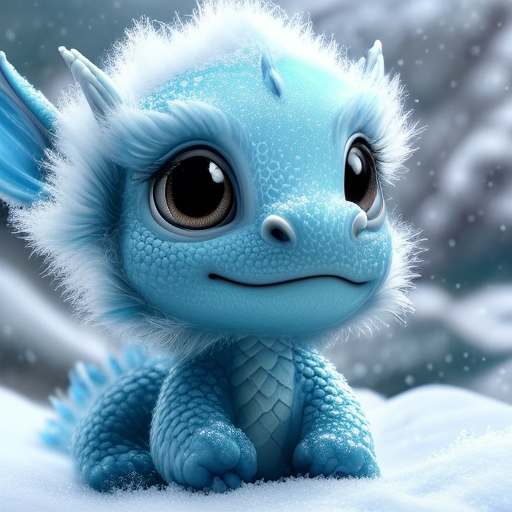

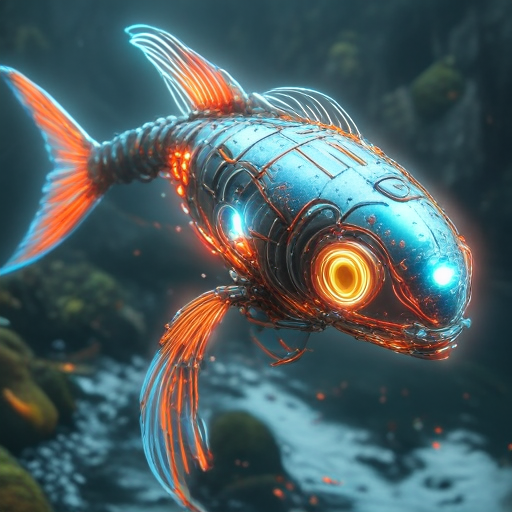

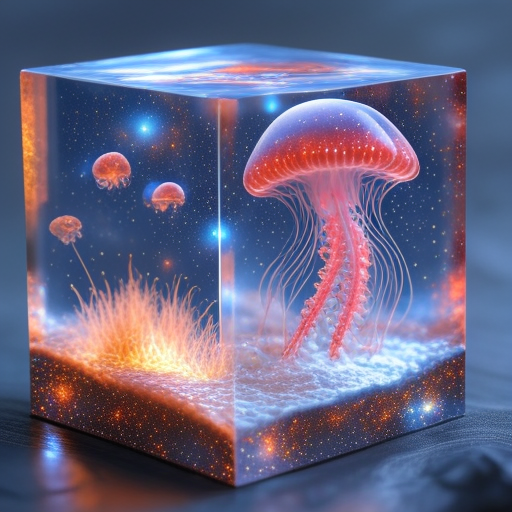

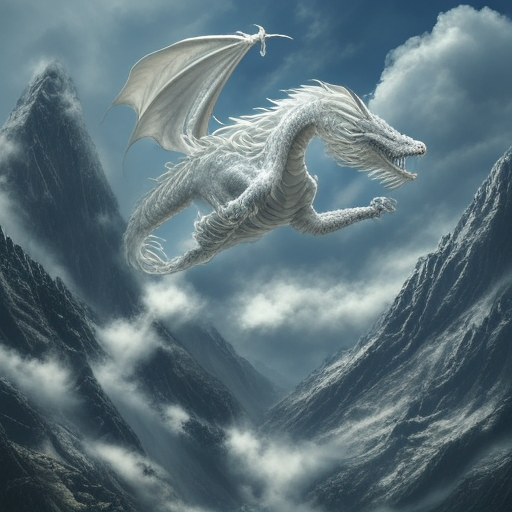

In [ ]:
# Display the images
for image in images:
    display(image)